# Descriptive statistics

In this notebook we'll see how to calculate numerical and graphical summaries of different types of data. Open the [chapter preview](https://minireference.com/static/excerpts/noBSstats/descriptive_statistics.pdf) in another tab, and follow along with the hands on calculations based on `pandas` and `plotnine`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
from plotnine.themes.elements import element_blank


# notebooks figs setup
%matplotlib inline
import matplotlib, matplotlib.pyplot as plt
# matplotlib.rcParams['figure.figsize'] = (20, 12)


# silence please; developers at work
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#@title Load CSV data
import io
data_file = io.StringIO("""
student_ID,background,curriculum,effort,score
1,arts,debate,10.96,75
2,science,lecture,8.69,75
3,arts,debate,8.6,67
4,arts,lecture,7.92,70.3
5,science,debate,9.9,76.1
6,business,debate,10.8,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57
10,science,lecture,7.71,69
11,business,debate,9.82,70.4
12,arts,debate,11.53,96.2
13,science,debate,7.1,62.9
14,science,lecture,6.39,57.6
15,arts,debate,12,84.3
""")

In [ ]:
grades_data = pd.read_csv(data_file, index_col="student_ID")
grades_data

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1
6,business,debate,10.80,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57.0


In [ ]:
# rows
grades_data.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='student_ID')

In [ ]:
# columns
grades_data.columns

Index(['background', 'curriculum', 'effort', 'score'], dtype='object')

# Describing numeric data

Let'look at the scrore variable.

In [ ]:
scores = grades_data['score']
scores.describe()

count    15.000000
mean     72.580000
std       9.979279
min      57.000000
25%      68.000000
50%      72.700000
75%      75.750000
max      96.200000
Name: score, dtype: float64

In [ ]:
scores.median()

72.7

In [ ]:
scores.max()

96.2

In [ ]:
scores.mean()

72.58

In [ ]:
scores.var() # variance 1/n EE(x-mean)^2

99.58600000000001

In [ ]:
 scores.var(ddof=0)  # bias-corrected variance,  1/(n-1) EE(x-mean)^2

92.94693333333335

In [ ]:
scores.std()

9.979278531036199

In [ ]:
scores.value_counts(bins=[50,60,70,80,90,100]).sort_index()

(49.999, 60.0]    2
(60.0, 70.0]      3
(70.0, 80.0]      8
(80.0, 90.0]      1
(90.0, 100.0]     1
Name: score, dtype: int64

In [ ]:
# note mode is the bin 70--80, which contains 8 values

In [ ]:
# scores.hist()

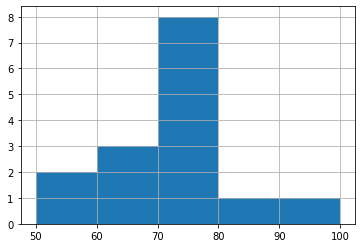

In [ ]:
scores.hist(bins=[50,60,70,80,90,100])

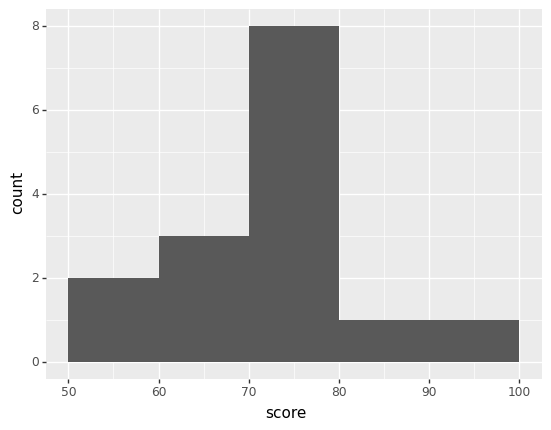

<ggplot: (8788814100473)>

In [ ]:
ggplot(grades_data, aes(x="score")) + \
    geom_histogram(breaks=[50,60,70,80,90,100])

# the \ character is to continue command on next line

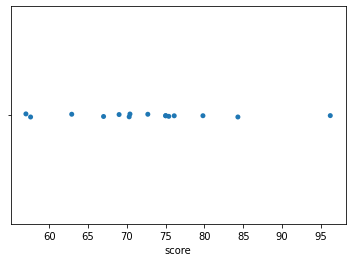

In [ ]:
sns.stripplot(x=scores, jitter=0.01)

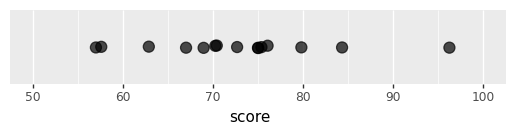

<ggplot: (8755367919757)>

In [ ]:
ggplot(grades_data, aes(x="score", y=0)) + \
    geom_point(alpha=0.7, size=4, position="jitter") + \
    theme(
        aspect_ratio=0.15,
        panel_grid_major_y = element_blank(),
        panel_grid_minor_y = element_blank(),
        axis_title_y = element_blank(),
        axis_ticks_major_y = element_blank(),
        axis_ticks_minor_y = element_blank(),
        axis_text_y = element_blank(),
        axis_line_y = element_blank()
    ) + \
	  scale_x_continuous(limits=[50,100]) + \
	  scale_y_continuous(limits=[-10,10])

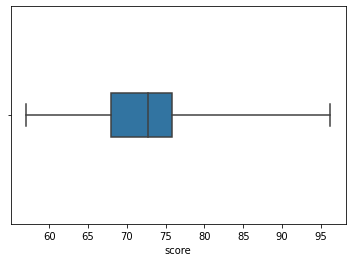

In [ ]:
sns.boxplot(x=scores, width=0.2, whis=10)

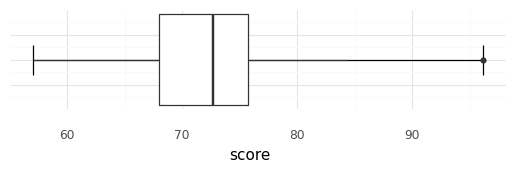

<ggplot: (8755351668149)>

In [ ]:
# non-Tukey boxplot (whiskers set to min and max)
ggplot(grades_data, aes(x=1, y="score")) + \
 	  coord_flip() + \
    theme_minimal() + \
    stat_boxplot(geom="errorbar", width=0.3, coef=10) + \
    geom_boxplot(width=0.9) + \
    theme(
        aspect_ratio=0.2,
        axis_title_y = element_blank(),
        axis_text_y = element_blank(),
        axis_line_y = element_blank()
    )


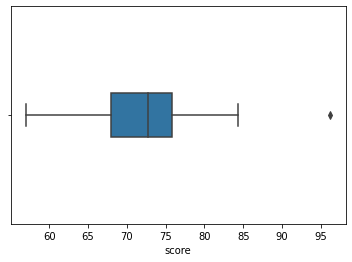

In [ ]:
sns.boxplot(x=scores, width=0.2)

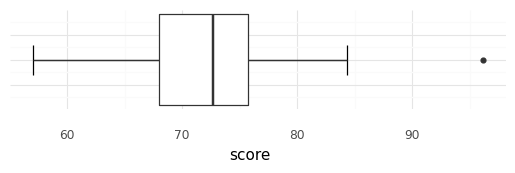

<ggplot: (8755351891661)>

In [ ]:
# boxplot
ggplot(grades_data, aes(y='score', x=0)) + \
 	  coord_flip() + \
    theme_minimal() + \
    stat_boxplot(geom="errorbar", width=0.3) + \
    geom_boxplot(width=0.9) + \
    theme(
        aspect_ratio=0.2,
        axis_title_y = element_blank(),
        axis_text_y = element_blank(),
        axis_line_y = element_blank()
    )

In [ ]:
scores.quantile(0.25)  # Q1

68.0

In [ ]:
scores.quantile(0.5)  # Q2 = median

72.7

In [ ]:
scores.quantile(0.75)  # Q3

75.75

In [ ]:
IQR = scores.quantile(0.75) - scores.quantile(0.25)
IQR

7.75

# Categorical data

In [ ]:
bg = grades_data['background']
bg

student_ID
1         arts
2      science
3         arts
4         arts
5      science
6     business
7      science
8     business
9     business
10     science
11    business
12        arts
13     science
14     science
15        arts
Name: background, dtype: object

In [ ]:
# frequencies
bg.value_counts()

science     6
arts        5
business    4
Name: background, dtype: int64

In [ ]:
# relative frequencies
bg.value_counts() / len(bg)

science     0.400000
arts        0.333333
business    0.266667
Name: background, dtype: float64

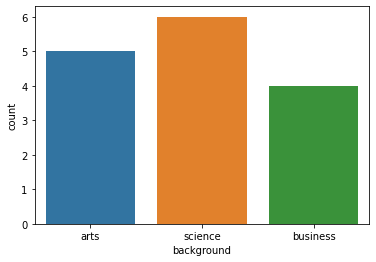

In [ ]:
# bar chart of counts
sns.countplot(x=bg)

In [ ]:
# sns.barplot?

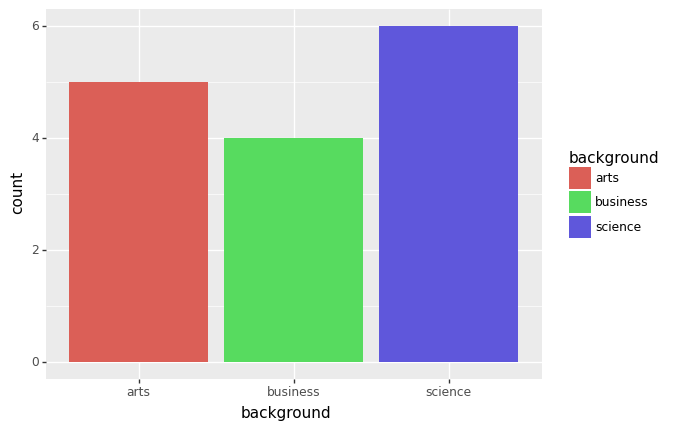

<ggplot: (8788811625957)>

In [ ]:
ggplot(grades_data, aes(x="background", fill="background")) + \
    geom_bar()

# Comparing two numeric variables


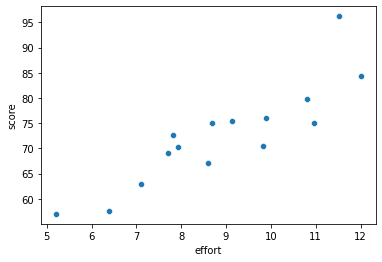

In [ ]:
sns.scatterplot(data=grades_data, x="effort", y="score")

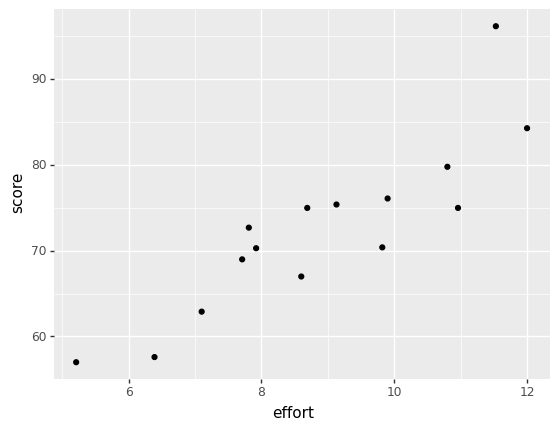

<ggplot: (8788813897057)>

In [ ]:
ggplot(grades_data, aes(x="effort", y="score")) + \
    geom_point()

In [ ]:
grades_data.cov()

,effort,score
effort,3.795312,17.097314
score,17.097314,99.586000


In [ ]:
grades_data.cov()['effort']['score']   # note: this uses 1/n-1

17.097314285714287

In [ ]:
grades_data.corr()['effort']['score']  # note: this uses 1/n-1

0.8794375135614694

# Comparing two categorical variables

In [ ]:
# TODO: figure out how to get stacked graph
# sns.countplot(data=grades_data, x="background", y="curriculum")

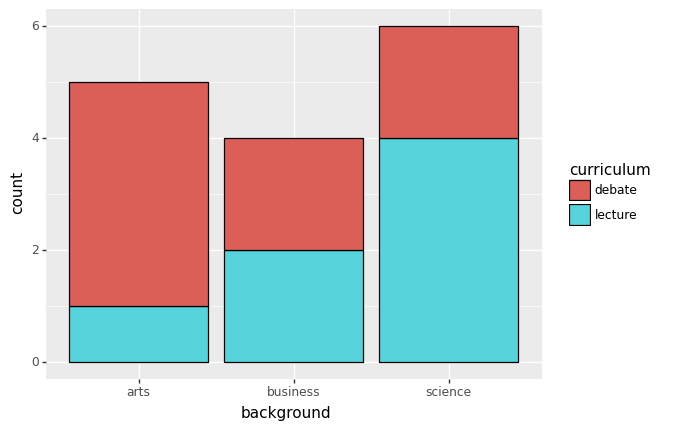

<ggplot: (8788813728337)>

In [ ]:
ggplot(grades_data, aes(x="background")) + \
	  geom_bar(aes(x='background', fill='curriculum'), color = "black")


# Comparing a categorical and a numerical variable

In [ ]:
# TODO(ivan): figure out seaborn way

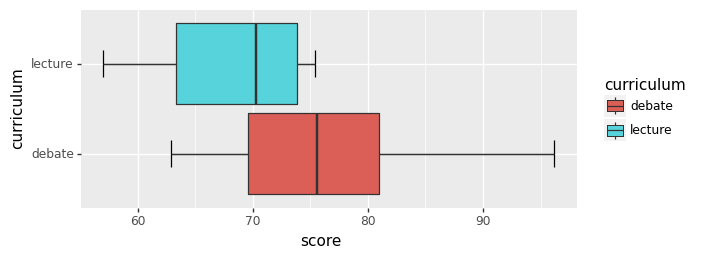

<ggplot: (8755351829833)>

In [ ]:
# compare boxplots
ggplot(grades_data, aes(x='curriculum', y='score', fill='curriculum')) + \
  coord_flip() + \
	stat_boxplot(geom="errorbar", width=0.3) + \
	geom_boxplot(width=0.9) + \
  theme(aspect_ratio=0.4)

## Chelsea tutorial sample code

see

- https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/InClass/LectureNotebooks/Visualization%20I--Class%204.ipynb
- https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/InClass/LectureNotebooks/Visualization%20II--Class%205.ipynb


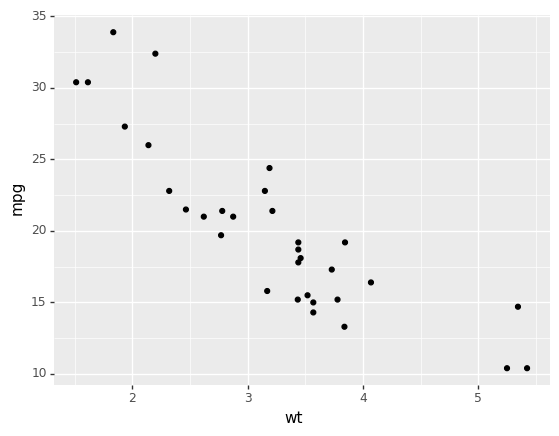

<ggplot: (8788813817189)>

In [ ]:
from plotnine import *
from plotnine.data import mtcars

# option 1 ok on same line
ggplot(mtcars, aes(x="wt", y="mpg")) + geom_point()

# option 2 (most common) bcs Py exprs inside parens allow newlines
(ggplot(mtcars, aes(x="wt", y="mpg")) +
 geom_point())

# option 3
ggplot(mtcars, aes(x="wt", y="mpg")) + \
    geom_point()

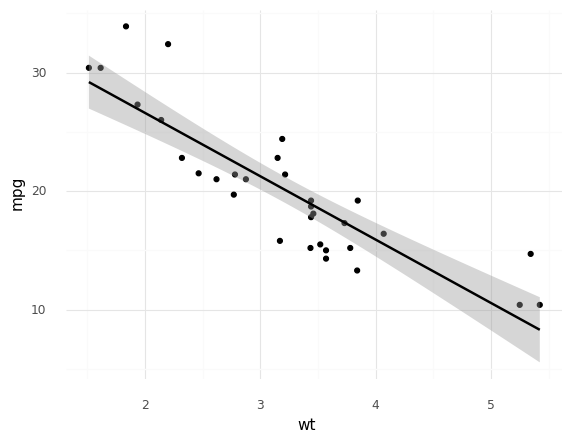

<ggplot: (8788813742497)>

In [ ]:
ggplot(mtcars, aes(x="wt", y="mpg")) + \
geom_point() + \
stat_smooth(method="lm") + \
theme_minimal()

In [ ]:
penguin = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv")
print(penguin.head())

   Unnamed: 0 species     island  ...  body_mass_g     sex  year
0           0  Adelie  Torgersen  ...       3750.0    male  2007
1           1  Adelie  Torgersen  ...       3800.0  female  2007
2           2  Adelie  Torgersen  ...       3250.0  female  2007
3           3  Adelie  Torgersen  ...          NaN     NaN  2007
4           4  Adelie  Torgersen  ...       3450.0  female  2007

[5 rows x 9 columns]


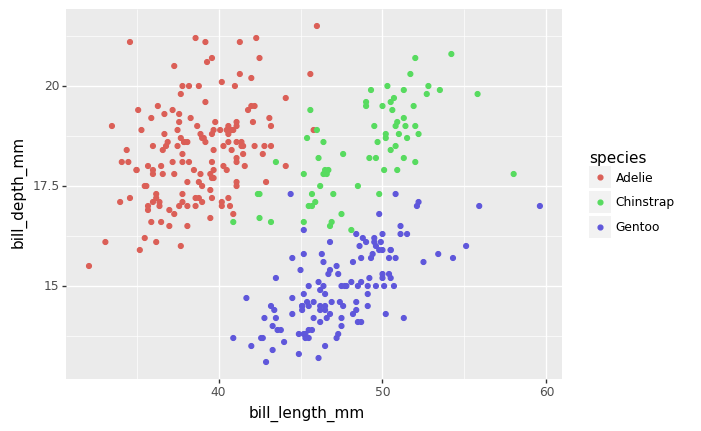

<ggplot: (8788813886629)>

In [ ]:
ggplot(penguin, aes(x="bill_length_mm", y="bill_depth_mm", color="species")) + \
geom_point()

In [ ]:
# (ggplot(penguin, aes( x = "body_mass_g")))

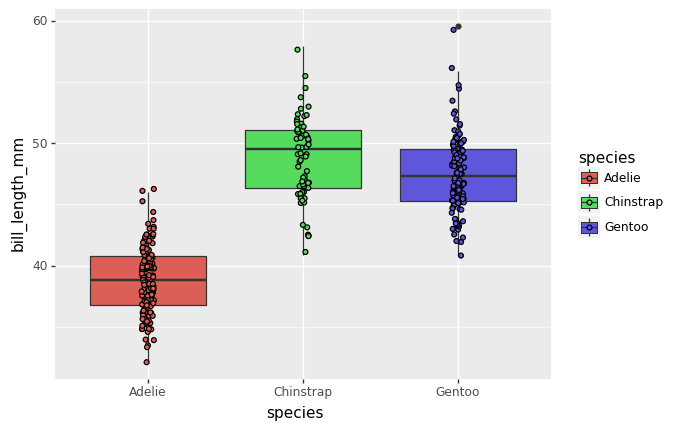

<ggplot: (8764586007221)>

In [ ]:
ggplot(penguin, aes(x="species", y="bill_length_mm", fill="species")) + \
    geom_boxplot() + \
    geom_point(position=position_jitter(width=0.04))

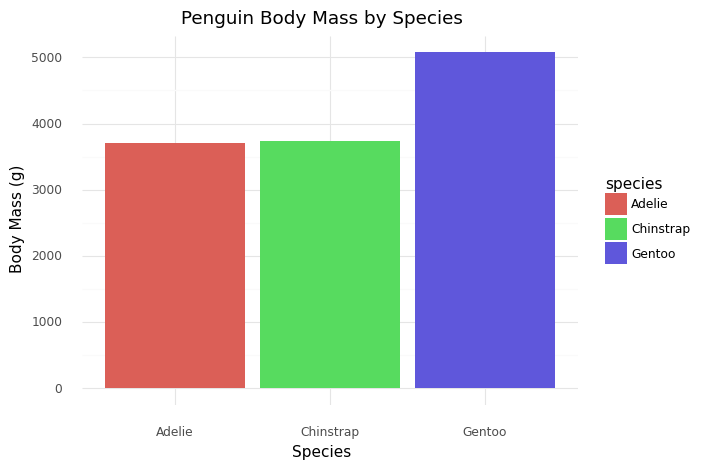

<ggplot: (8764586025421)>

In [ ]:
ggplot(penguin, aes(x="species", y="body_mass_g", fill="species")) + \
    stat_summary(fun_data="mean_sdl", geom="bar") + \
    ggtitle("Penguin Body Mass by Species") + \
    labs(x="Species", y="Body Mass (g)") + \
    theme(
        panel_grid_major_x = element_blank(),
        panel_grid_minor_x = element_blank(),
        panel_grid_minor_y = element_blank(),
        legend_position = "none"
    ) + theme_minimal()

In [ ]:
cereal = pd.read_csv("https://raw.githubusercontent.com/reisanar/datasets/master/Cereals.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [ ]:
cereal.shape

(77, 16)

In [ ]:
# via https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/InClass/LectureNotebooks/Visualization%20II--Class%205.ipynb


In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv")
diabetes = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/diabetes2.csv")
popdivas = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/PopDivas_data.csv")

In [ ]:
# popdivas

In [ ]:
popdivas.shape

(1599, 14)

In [ ]:
# popdivas['track_name'][popdivas["artist_name"]=="Beyoncé"]

In [ ]:
# popdivas[popdivas["artist_name"]=="Beyoncé"]['track_name']

# I am seriously questioning this dataset since it doesn't include 
# Flawless by Beyoncé, which is like the greatest song of all time
# https://www.youtube.com/watch?v=IyuUWOnS9BY&t=141s